In [4]:
!pip install deap
!pip install scikit-learn
!pip install matplotlib

  Using cached deap-1.4.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (135 kB)


In [5]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from deap import creator, base, tools, algorithms

In [34]:
df = pd.read_csv('./Passageiros.csv')
df

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [35]:
# Remover linhas com qualquer valor NaN
df_dropped_rows = df.dropna()
df_dropped_rows

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [36]:
# Dados de Tempo(meses)
x = df_dropped_rows['tempo']

# Dados de Quantidade de Passageiros
y = df_dropped_rows['passageiros']
print(x)

0      1949.000000
1      1949.083333
2      1949.166667
3      1949.250000
4      1949.333333
          ...     
139    1960.583333
140    1960.666667
141    1960.750000
142    1960.833333
143    1960.916667
Name: tempo, Length: 144, dtype: float64


In [37]:
# Dados treinamento
x_train, x_test = x[:111], x[110:]

# Dados de Teste final
y_train, y_test = y[:111], y[110:]

# Dados de Teste do treinamento
x_train_train, x_test_train = x[:81], x[80:]
y_train_train, y_test_train = y[:81], y[80:]

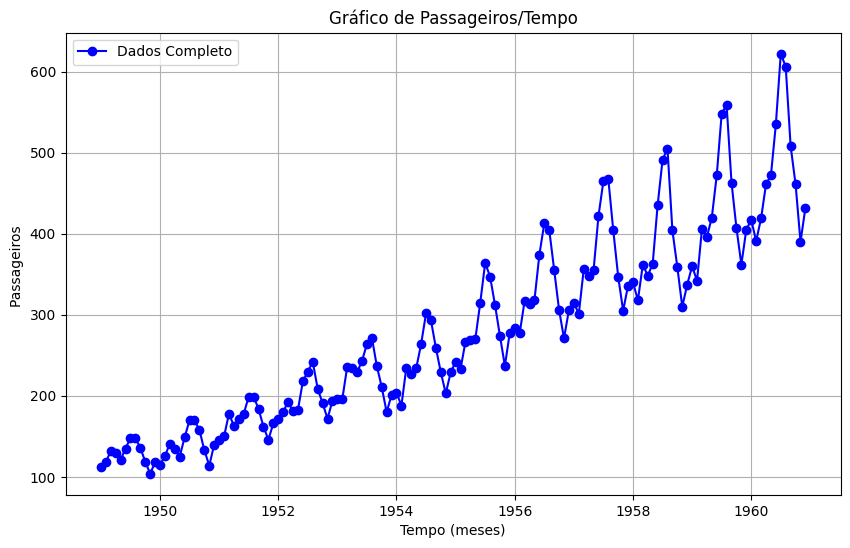

In [50]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))

# Dados do DataFrame
plt.plot(x, y, label='Dados Completo', linestyle='-', marker='o', color='blue')

# Legendas
plt.xlabel('Tempo (meses)')
plt.ylabel('Passageiros ')
plt.title('Gráfico de Passageiros/Tempo')
plt.legend()

plt.grid(True)
plt.show()

In [39]:
# Configuração do DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -10, 10)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=6)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", eval)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [40]:
scaler = StandardScaler()

# Converter Dados de Treinamento para um array NumPy e normalizar os dados
x_train_array = x_train_train.to_numpy().reshape(-1, 1)
x_train_normalized = scaler.fit_transform(x_train_array).flatten()

In [41]:
# Converter Dados de Teste do Treinamento para um array NumPy e normalizar os dados
x_test_array = x_test_train.to_numpy().reshape(-1, 1)
x_test_normalized = scaler.fit_transform(x_test_array).flatten()

In [42]:
# Função de Calculo de Matemático para a validação
def f(individual, x = x_train_normalized ):
  a, b, c, d, e, h = individual
  termo_linear = a * x
  termo_quadratico = b * x**2
  termo_exponencial = c * np.exp(d * x)
  termo_trigonometrico = e * np.cos(x)
  termo_escalar = h + x
  return termo_linear + termo_quadratico + termo_trigonometrico + termo_exponencial + termo_escalar

In [43]:
def eval(individual):
    a, b, c, d, e, h = individual

    # Calcular as previsões para o conjunto de treinamento
    y_pred_train = f(individual, x_train_normalized)

    # Calcular o MSE nos dados de treinamento
    mse_train = mean_squared_error(y_train_train, y_pred_train)

    # Calcular as previsões para o conjunto de teste
    y_pred_test = f(individual, x_test_normalized)

    # Calcular o MSE nos dados de teste
    mse_test = mean_squared_error(y_test_train, y_pred_test)

    # Penalizar modelos mais complexos e favorecer modelos mais simples
    complexity_penalty = len(individual)
    penalty_factor = 0.01  # Fator de penalização para complexidade do modelo

    # Calcula a penalidade total, combinando o MSE com a penalização de complexidade
    fitness = mse_test + penalty_factor * complexity_penalty

    return fitness,


In [44]:
# Parâmetros do algoritmo
POP_SIZE = 100
NUM_GENERATIONS = 1000

# Inicialização da população
pop = toolbox.population(n=POP_SIZE)

In [45]:
# Avaliação inicial da população
for individual in pop:
    individual.fitness.values = toolbox.evaluate(individual)

In [ ]:
# Execução do algoritmo genético
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=NUM_GENERATIONS, verbose=False)

In [47]:
best_ind = tools.selBest(pop, 1)[0]

print("Melhor indivíduo:", best_ind)
print("Erro quadrático médio encontrado:", best_ind.fitness.values[0])

Melhor indivíduo: [-32.04701496338596, 23.64723595279008, 99.02563101283198, 0.7574729959845443, 133.68188824743754, 159.06750054351556]
Erro quadrático médio encontrado: 3667.3936438838887


In [48]:
# Converter x para um array NumPy e normalizar os dados
x_test_array = x_test.to_numpy().reshape(-1, 1)
x_test_normalized = scaler.fit_transform(x_test_array).flatten()

y_pred = f(best_ind, x_test_normalized)

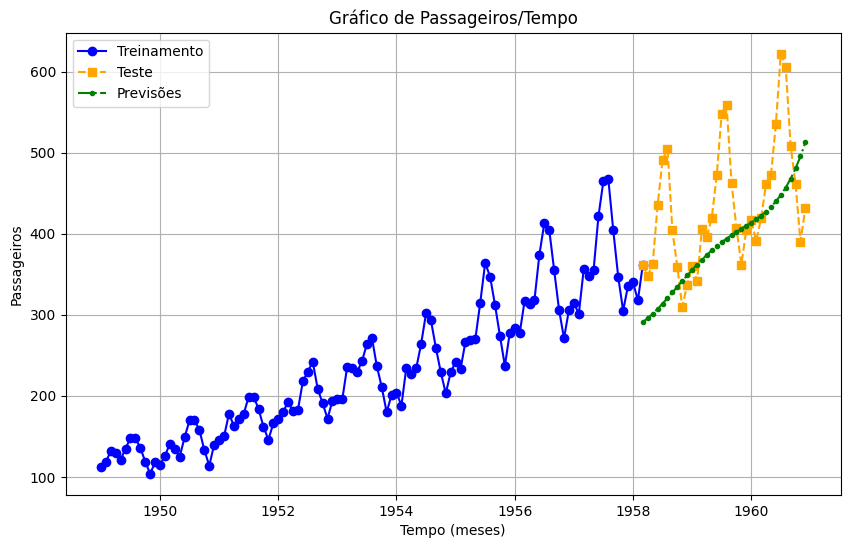

In [49]:
plt.figure(figsize=(10, 6))

# Dados de treinamento
plt.plot(x_train, y_train, label='Treinamento', linestyle='-', marker='o', color='blue')

# Dados de teste
plt.plot(x_test, y_test, label='Teste', linestyle='--', marker='s', color='orange')

# Previsões
plt.plot(x_test, y_pred, label='Previsões', linestyle='-.', marker='.', color='green')

# Rótulos e título
plt.xlabel('Tempo (meses)')
plt.ylabel('Passageiros')
plt.title('Gráfico de Passageiros/Tempo')

# Adicionar uma grade
plt.grid(True)

# Adicionar uma legenda
plt.legend()

# Mostrar o gráfico
plt.show()